# Ethereum
<img src="https://2163491710-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F-McrExXKKJBLJqymbFhO%2Fuploads%2Fgit-blob-e872ec46815c6b27a656435e59e6a3c45435c080%2F1200px-Ethereum-icon-purple.svg.png?alt=media" alt="Ethereum" width="300"/>

Ethereum is a technology for building apps and organizations, holding assets, transacting and communicating without being controlled by a central authority. There is no need to hand over all your personal details to use Ethereum - you keep control of your own data and what is being shared. Ethereum has its own cryptocurrency, Ether, which is used to pay for certain activities on the Ethereum network.

---


# Etherscan
![etherscan](https://etherscan.io/assets/svg/logos/logo-etherscan.svg?v=0.0.2 "Etherscan")

Etherscan is a Block Explorer and Analytics Platform for Ethereum, a decentralized smart contracts platform.

- Using Etherscan, we can get information about the latest blocks and transactions of the network. 
- Registration, any fee, or special access are not needed to view this information on a service. Users can follow the changes in real-time.

So, Today we are going to explore some of the API's available for etherscan to do analysis on the ethereum network. 

![Learn](https://media1.giphy.com/media/ZoAa7lsmym6UE/giphy.gif?cid=ecf05e47jfds14rvvchfgubx8j8yqxf502pcwq0xs7rdt0fj&rid=giphy.gif&ct=g)

## Registration
Firstly, you will have to go and create an account at [etherscan](https://etherscan.io/).
![etherscan](images/etherscan.png "Etherscan")

---

- Once you have signed up, you can go to your profile and go to the API section. 
- You will have to create a project, then you will be able to copy your API keys.  

---

![etherscan_api](images/etherscan_api.png "etherscan_api")

---
- API access is free for most features but some are paid. We are only going to cover the free sections here. 

---
Once you have your API key's we can get started and pull information about the ethereum network.

In [157]:
# I have saved my API keys, in a file named secrets.py for security reasons, you can paste it directly here.
from secrets import api_key as API_KEY

## Documentation
You can get the API documentation for etherscan [here.](https://docs.etherscan.io/)

## Get Ether Balance for a Single Address
### Returns the Ether balance of a given address.

In [158]:
api_endpoint = '''
https://api.etherscan.io/api
   ?module=account
   &action=balance
   &address=0xde0b295669a9fd93d5f28d9ec85e40f4cb697bae
   &tag=latest
   &apikey=YourApiKeyToken
'''

This is what the API expects as an endpoint, so we want to create a function that creates this endpoint based on our custom parameters. 

In [159]:
BASE_URL = "https://api.etherscan.io/api"

def make_url(module, action, address, **kwargs):
    url = BASE_URL + f"?module={module}&action={action}&address={address}&apikey={API_KEY}"

    for key, value in kwargs.items():
        url += f"&{key}={value}"

    return url

## Address
Now it is upto you which wallet you want to analyse, here i am going to use a wallet of one of the biggest exchanges **binance**. Let's see how their transactions look like. ^_^ 

In [160]:
# Address of binance wallet
binance_address = "0xF977814e90dA44bFA03b6295A0616a897441aceC"

In [161]:
make_url('account', 'balance', binance_address, tag='latest')

'https://api.etherscan.io/api?module=account&action=balance&address=0xF977814e90dA44bFA03b6295A0616a897441aceC&apikey=BHFV9BPJU561BBMYEDAG3ZDQ8IARGNRWCD&tag=latest'

So with this, we are successgfully able to create an endpoint.
If you want, you can copy this endpoint in your browser and it will give you the balance of this wallet. 

![wallet_balance](images/wallet_balance_binance.png "wallet_balance")

## Using requests
Now what we want to acheive the same thing, but not with a browser. This is where requests and python comes in.  

We can use the python library requests to make http calls and get these results.

In [162]:
import requests

In [163]:
# Firstly, let's make the URL endpoint
balance_url = make_url("account", "balance", binance_address, tag="latest")

In [164]:
balance_url

'https://api.etherscan.io/api?module=account&action=balance&address=0xF977814e90dA44bFA03b6295A0616a897441aceC&apikey=BHFV9BPJU561BBMYEDAG3ZDQ8IARGNRWCD&tag=latest'

In [165]:
# Now, let's hit that endpoint with requests
response = requests.get(balance_url)

In [166]:
response.status_code

200

![Success](https://media0.giphy.com/media/a0h7sAqON67nO/giphy.gif?cid=ecf05e47ai7bd3lkxk2xzjpk2w5wth06c3fug1kdgwmzd0fg&rid=giphy.gif&ct=g)

Successfully got the results, let's see what's inside

In [167]:
response.json()

{'status': '1', 'message': 'OK', 'result': '2104666648664120958979194'}

So, we get a status code 1, meaning sucess and we got the result '2104666648664120958979194' which is the balance in wei.

Wei is the smallest denomination of ether—the cryptocurrency coin used on the Ethereum network. One ether = 1,000,000,000,000,000,000 wei (1018). The other way to look at it is one wei is one quintillionth of an ether.

People did came up with other denominations.

![wei](https://www.investopedia.com/thmb/XqqZp7mA1vGnK5DwIdfidNLuTIw=/660x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/dotdash_INV_final_Gwei_Ethereum_Jan_2021-01-370e27f6becf4830b333dacffe739415.jpg "wei")

But, we will keep all of our analysis in eth, so let's convert the 'wei' to 'eth' balance.

![feeww](https://media1.giphy.com/media/xT5LMzIK1AdZJ4cYW4/giphy.gif?cid=ecf05e47ja8doc2ae9885gkixa6suwr4t84lndmfdto1btmf&rid=giphy.gif&ct=g)

In [168]:
eth_wei_value = 10 ** 18
print(int(response.json()['result'])/eth_wei_value)

2104666.648664121


So, in the binance wallet, at the time of executing this API call, it had 21 lakh eth 🥲

At the price of 1500$, that would be worth 315 Crore 🥴

In [169]:
# Let's summarise that in a function
def get_account_balance(address):
    balance_url = make_url("account", "balance", address, tag="latest")
    response = requests.get(balance_url)
    data = response.json()

    value = int(data["result"]) / eth_wei_value
    return value

In [170]:
get_account_balance(binance_address)

2104666.648664121

### With this, you can get the balance of any ethereum wallet.

---

# Get a list of 'Normal' Transactions By Address
Returns the list of transactions performed by an address, with optional pagination.

In [171]:
'''
https://api.etherscan.io/api
   ?module=account
   &action=txlist
   &address=0xc5102fE9359FD9a28f877a67E36B0F050d81a3CC
   &startblock=0
   &endblock=99999999
   &page=1
   &offset=10
   &sort=asc
   &apikey=YourApiKeyToken
'''

'\nhttps://api.etherscan.io/api\n   ?module=account\n   &action=txlist\n   &address=0xc5102fE9359FD9a28f877a67E36B0F050d81a3CC\n   &startblock=0\n   &endblock=99999999\n   &page=1\n   &offset=10\n   &sort=asc\n   &apikey=YourApiKeyToken\n'

Again, this is what the API expects as an endpoint, so we want to create a function that creates this endpoint based on our custom parameters. 

In [172]:
BASE_URL = "https://api.etherscan.io/api"

def make_url(module, action, address, **kwargs):
    url = BASE_URL + f"?module={module}&action={action}&address={address}&apikey={API_KEY}"

    for key, value in kwargs.items():
        url += f"&{key}={value}"

    return url

In [173]:
# Using our earlier function
make_url("account", "txlist", binance_address, startblock=0, endblock=99999999, page=1, offset=10, sort='asc')

'https://api.etherscan.io/api?module=account&action=txlist&address=0xF977814e90dA44bFA03b6295A0616a897441aceC&apikey=BHFV9BPJU561BBMYEDAG3ZDQ8IARGNRWCD&startblock=0&endblock=99999999&page=1&offset=10&sort=asc'

Looks like the function works. You can copy paste this in the browser to check.

In [174]:
transactional_url = make_url("account", "txlist", binance_address, startblock=0, endblock=99999999, page=1, offset=100, sort='asc')

In [175]:
# Using requests
data = requests.get(transactional_url)

In [176]:
data.status_code

200

Works !

![test](https://media1.giphy.com/media/l1usT0HOMDIgWk16Om/giphy.gif?cid=ecf05e47e5t4u1b3dlqwwmrqw5k39f390zf8ifd6i9tmuihs&rid=giphy.gif&ct=g)

In [177]:
# Let's see what's inside
data.json()

{'status': '1',
 'message': 'OK',
 'result': [{'blockNumber': '8117712',
   'timeStamp': '1562683760',
   'hash': '0xa2d486feda9ae171e5180e2cec8bdd36e1104ae62d173040441aac5344af60e5',
   'nonce': '946',
   'blockHash': '0x165bd4f363f2c64a1afaeb8b1fa63fe2f17f63f033740fbb4d4044f91edf8fd2',
   'transactionIndex': '76',
   'from': '0x030e37ddd7df1b43db172b23916d523f1599c6cb',
   'to': '0xf977814e90da44bfa03b6295a0616a897441acec',
   'value': '320000230000000000000000',
   'gas': '21000',
   'gasPrice': '10500000000',
   'isError': '0',
   'txreceipt_status': '1',
   'input': '0x',
   'contractAddress': '',
   'cumulativeGasUsed': '3747113',
   'gasUsed': '21000',
   'confirmations': '7312974',
   'methodId': '0x',
   'functionName': ''},
  {'blockNumber': '8117731',
   'timeStamp': '1562684042',
   'hash': '0x9fc4f7d1b04013cf82f5b5c65178ff5135c2a8c48d8a70f292754637df460528',
   'nonce': '0',
   'blockHash': '0x63cd523e65b0aa47702519da9ebc2093af32679613cb3f65a17154ebae1fabf2',
   'transacti

In [178]:
# Let's see how many transactions we got
len(data.json()['result'])

100

We got 100, just as we passed in the parameters

In [179]:
# Let's look at an individual result
data.json()['result'][0]

{'blockNumber': '8117712',
 'timeStamp': '1562683760',
 'hash': '0xa2d486feda9ae171e5180e2cec8bdd36e1104ae62d173040441aac5344af60e5',
 'nonce': '946',
 'blockHash': '0x165bd4f363f2c64a1afaeb8b1fa63fe2f17f63f033740fbb4d4044f91edf8fd2',
 'transactionIndex': '76',
 'from': '0x030e37ddd7df1b43db172b23916d523f1599c6cb',
 'to': '0xf977814e90da44bfa03b6295a0616a897441acec',
 'value': '320000230000000000000000',
 'gas': '21000',
 'gasPrice': '10500000000',
 'isError': '0',
 'txreceipt_status': '1',
 'input': '0x',
 'contractAddress': '',
 'cumulativeGasUsed': '3747113',
 'gasUsed': '21000',
 'confirmations': '7312974',
 'methodId': '0x',
 'functionName': ''}

### Looking at this, a few ideas come to mind.
- You can calculate the total transactions(in/out)
- You can calculate the balance
- You can calculate the gas cost for all the transactions

And these are just a few ideas, i can think on top of my head.

# What is Gas fees
Gas refers to the unit that measures the amount of computational effort required to execute specific operations on the Ethereum network.

Since each Ethereum transaction requires computational resources to execute, each transaction requires a fee. Gas refers to the fee required to conduct a transaction on Ethereum successfully.

![gas_fees](https://ethereum.org/static/9628ab90bfd02f64cf873446cbdc6c70/302a4/gas.png)

Gas fees are paid in Ethereum's native currency, ether (ETH). Gas prices are denoted in gwei, which itself is a denomination of ETH - each gwei is equal to 0.000000001 ETH (10-9 ETH). For example, instead of saying that your gas costs 0.000000001 ether, you can say your gas costs 1 gwei.

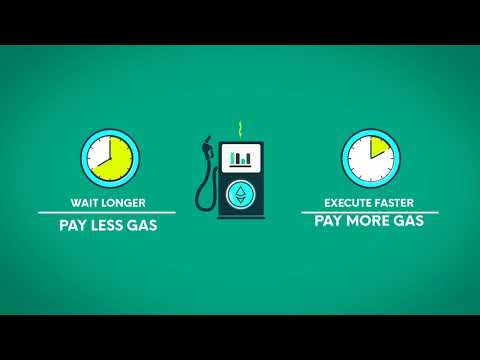

In [180]:
from IPython.display import YouTubeVideo
YouTubeVideo('AJvzNICwcwc', width=800, height=300)

## Let's calculate the total transaction amount 

In [181]:
result = data.json()['result']

In [182]:
result

[{'blockNumber': '8117712',
  'timeStamp': '1562683760',
  'hash': '0xa2d486feda9ae171e5180e2cec8bdd36e1104ae62d173040441aac5344af60e5',
  'nonce': '946',
  'blockHash': '0x165bd4f363f2c64a1afaeb8b1fa63fe2f17f63f033740fbb4d4044f91edf8fd2',
  'transactionIndex': '76',
  'from': '0x030e37ddd7df1b43db172b23916d523f1599c6cb',
  'to': '0xf977814e90da44bfa03b6295a0616a897441acec',
  'value': '320000230000000000000000',
  'gas': '21000',
  'gasPrice': '10500000000',
  'isError': '0',
  'txreceipt_status': '1',
  'input': '0x',
  'contractAddress': '',
  'cumulativeGasUsed': '3747113',
  'gasUsed': '21000',
  'confirmations': '7312974',
  'methodId': '0x',
  'functionName': ''},
 {'blockNumber': '8117731',
  'timeStamp': '1562684042',
  'hash': '0x9fc4f7d1b04013cf82f5b5c65178ff5135c2a8c48d8a70f292754637df460528',
  'nonce': '0',
  'blockHash': '0x63cd523e65b0aa47702519da9ebc2093af32679613cb3f65a17154ebae1fabf2',
  'transactionIndex': '126',
  'from': '0xf977814e90da44bfa03b6295a0616a897441acec

In [183]:
total = []
for i in result:
    total.append(int(i['value']))

sum(total)

1066948613604144975554809

![facepalm](https://media2.giphy.com/media/3xz2BLBOt13X9AgjEA/giphy.gif?cid=ecf05e47ijsrya9c5s2e9fgvh6wb4g6ou9r21m3makmjca0f&rid=giphy.gif&ct=g)

The total is in wei, we will need to convert this to Eth. 

In [184]:
sum(total)/eth_wei_value

1066948.613604145

Since we are only looking at the very first 100 transactions, the total transaction amount is 10 Lakh Eth. Which at today's price would be 160 crore. Not bad 

![not_bad](https://media2.giphy.com/media/13ZHjidRzoi7n2/giphy.gif?cid=ecf05e47k0jazp4yo4mrgwytrslxfl0bk37m9b14594mlr0i&rid=giphy.gif&ct=g)

---

## Let's calculate the gas cost for all the transactions

In [185]:
gas_cost = []
for i in result:
    cost = int(i['gasPrice']) * int(i['gasUsed'])
    gas_cost.append(cost)

In [186]:
sum(gas_cost)

39411118086764434

In [187]:
# Converting to eth
sum(gas_cost)/eth_wei_value

0.03941111808676443

So, for the very first transactions, the cost was 0.0394 eth. Which by today's price would be about $58.5. 

So for $160 crore worth of transaction, you pay 58. That is Ridiculous
![Ridiculous](https://media4.giphy.com/media/299byQTLdQda9v7LZH/giphy.gif?cid=ecf05e47gzbwhwam86985tlhzog81itb19ruck88oplpq0d6&rid=giphy.gif&ct=g)

## Let's calculate the balance

In [188]:
balance_history = []
time_history = []

balance = 0
for i in result:
    condition = binance_address.lower() == i['to'].lower()    
    if condition:
        balance += int(i['value'])
    else:
        balance -= int(i['value'])
    time_history.append(i['timeStamp'])
    
    # Converting wei to eth here only
    balance_history.append(balance/eth_wei_value)

### Let's look at balance history


In [189]:
balance_history

[320000.23,
 320000.23,
 320000.23,
 320000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 280000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 230000.23,
 190000.23,
 190000.23,
 190000.23,
 190000.23,
 190000.23,
 190000.23,
 190000.23,
 190000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 140000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100000.23,
 100

### # Let's look at the timestamps 

In [190]:
time_history

['1562683760',
 '1562684042',
 '1562684110',
 '1562727483',
 '1562727581',
 '1562727969',
 '1562728001',
 '1562728166',
 '1562820191',
 '1562820299',
 '1562820605',
 '1562820803',
 '1562821038',
 '1562821668',
 '1562822070',
 '1562849445',
 '1562849530',
 '1562877324',
 '1562877498',
 '1562910622',
 '1562929044',
 '1562929137',
 '1562948987',
 '1562988657',
 '1562989229',
 '1562991918',
 '1563036479',
 '1563036667',
 '1563157421',
 '1563182389',
 '1563211071',
 '1563213471',
 '1563246276',
 '1563247139',
 '1563263240',
 '1563263337',
 '1563266542',
 '1563277057',
 '1563320955',
 '1563321042',
 '1563321131',
 '1563321235',
 '1563330839',
 '1563336229',
 '1563360476',
 '1563360579',
 '1563362473',
 '1563367035',
 '1563367245',
 '1563407872',
 '1563408005',
 '1563444421',
 '1563464895',
 '1563471933',
 '1563490088',
 '1563490341',
 '1563490470',
 '1563504779',
 '1563509253',
 '1563546327',
 '1563549859',
 '1563549953',
 '1563583791',
 '1563583966',
 '1563595617',
 '1563608770',
 '15636089

What in the world is that

![confused](https://media2.giphy.com/media/L2qukNXGjccyuAYd3W/giphy.gif?cid=ecf05e476q0b0ay8qoe16axy12eo9ax8pz5lqgrycpw8v5y2&rid=giphy.gif&ct=g)

Ahh, So these are timestamps and we will have to convert them to a date time format

In [191]:
from datetime import datetime

correct_time_list = []
for i in time_history:
    correct_time = datetime.fromtimestamp(int(i))
    correct_time_list.append(correct_time)

In [192]:
correct_time_list

[datetime.datetime(2019, 7, 9, 20, 19, 20),
 datetime.datetime(2019, 7, 9, 20, 24, 2),
 datetime.datetime(2019, 7, 9, 20, 25, 10),
 datetime.datetime(2019, 7, 10, 8, 28, 3),
 datetime.datetime(2019, 7, 10, 8, 29, 41),
 datetime.datetime(2019, 7, 10, 8, 36, 9),
 datetime.datetime(2019, 7, 10, 8, 36, 41),
 datetime.datetime(2019, 7, 10, 8, 39, 26),
 datetime.datetime(2019, 7, 11, 10, 13, 11),
 datetime.datetime(2019, 7, 11, 10, 14, 59),
 datetime.datetime(2019, 7, 11, 10, 20, 5),
 datetime.datetime(2019, 7, 11, 10, 23, 23),
 datetime.datetime(2019, 7, 11, 10, 27, 18),
 datetime.datetime(2019, 7, 11, 10, 37, 48),
 datetime.datetime(2019, 7, 11, 10, 44, 30),
 datetime.datetime(2019, 7, 11, 18, 20, 45),
 datetime.datetime(2019, 7, 11, 18, 22, 10),
 datetime.datetime(2019, 7, 12, 2, 5, 24),
 datetime.datetime(2019, 7, 12, 2, 8, 18),
 datetime.datetime(2019, 7, 12, 11, 20, 22),
 datetime.datetime(2019, 7, 12, 16, 27, 24),
 datetime.datetime(2019, 7, 12, 16, 28, 57),
 datetime.datetime(2019, 7

# Let's Plot this 

In [193]:
import pandas as pd
df = pd.DataFrame({'Time':correct_time_list, 'Balance':balance_history})

<AxesSubplot:>

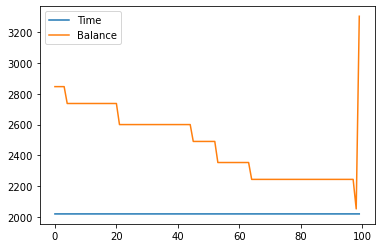

In [194]:
df.plot()

![Success](https://media4.giphy.com/media/Q81NcsY6YxK7jxnr4v/giphy.gif?cid=ecf05e47ai7bd3lkxk2xzjpk2w5wth06c3fug1kdgwmzd0fg&rid=giphy.gif&ct=g)

# Observations
So the balance kept on dropping and all of a sudden boom.

# What's next
Now you have the knowledge on how to explore different wallets. Go out and explore 
- Try out thousands of transactions rather than 100 like i have done here. 
- I have not incorporated the cost of gas feed in my balance calculation. Maybe you should try that !

# Special Thanks
Special Thanks to [Tech With Tim](https://www.youtube.com/c/TechWithTim), with whose youtube videos, i was able to learn the basics of the etherscan API